In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

In [10]:
data = pd.read_csv("data-comp/test_dataset_v01.csv")
data = data.loc[:,"url_len":]

# <b>Step 1. 데이터 분석하기
---

## <b>Q1. 데이터 단변량 분석하기


In [215]:
data.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
0,97,0,80.0,17.0,17.0,4,0,0,0,0,...,0,5.0,0,0,12,1,1,1.0,3.0,0
1,37,0,22.0,15.0,15.0,3,1,0,0,0,...,1,NaN,0,0,158,1,1,NaN,NaN,0
2,44,0,NaN,20.0,20.0,3,3,0,0,0,...,0,6.0,3,3,34,1,1,0.0,136.0,0
3,40,0,14.0,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,29,1,1,1.0,2.0,0
4,43,2,NaN,26.0,26.0,2,0,0,0,0,...,0,NaN,0,0,41,1,1,NaN,NaN,0


In [225]:
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
idx                        0
dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 227 to 2394
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  2441 non-null   int64  
 1   url_num_hyphens_dom      2441 non-null   int64  
 2   url_path_len             2441 non-null   float64
 3   url_domain_len           2441 non-null   float64
 4   url_hostname_len         2441 non-null   float64
 5   url_num_dots             2441 non-null   int64  
 6   url_num_underscores      2441 non-null   int64  
 7   url_query_len            2441 non-null   int64  
 8   url_num_query_para       2441 non-null   int64  
 9   url_ip_present           2441 non-null   int64  
 10  url_entropy              2441 non-null   float64
 11  url_chinese_present      2441 non-null   int64  
 12  url_port                 2441 non-null   int64  
 13  html_num_tags('iframe')  2441 non-null   int64  
 14  html_num_tags('script'

In [128]:
data.describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),idx
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,...,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.0,2441.000000
mean,52.455551,0.415404,27.130070,20.338591,20.227980,2.484228,0.274068,4.890619,0.092175,0.063499,...,7.852519,0.016387,0.029906,62.399836,1.004097,1.016796,1.006145,62.869930,0.0,1220.000000
std,81.659909,0.804898,72.814976,8.603724,8.566748,1.470703,1.199325,34.050793,0.555988,0.243908,...,10.726230,0.145062,0.245297,143.137764,0.202403,0.227524,1.155335,315.861639,0.0,704.800326
min,5.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,24.000000,0.000000,1.000000,15.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0,610.000000
50%,35.000000,0.000000,12.000000,17.842105,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,32.000000,1.000000,1.000000,1.000000,15.000000,0.0,1220.000000
75%,53.000000,1.000000,30.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,61.000000,1.000000,1.000000,1.000000,51.000000,0.0,1830.000000
max,1652.000000,6.000000,1631.000000,100.000000,99.000000,24.000000,19.000000,1088.000000,12.000000,1.000000,...,158.000000,3.000000,6.000000,3861.000000,9.000000,3.000000,19.000000,11868.000000,0.0,2440.000000


In [129]:
data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'idx'],
      dtype='object')

In [131]:
html_tags = ['html_num_tags(\'iframe\')', 'html_num_tags(\'script\')', 'html_num_tags(\'embed\')',
       'html_num_tags(\'object\')', 'html_num_tags(\'div\')',
       'html_num_tags(\'head\')', 'html_num_tags(\'body\')',
       'html_num_tags(\'form\')', 'html_num_tags(\'a\')',
       'html_num_tags(\'applet\')']
html_num_tags = []
for idx, row in data.iterrows():
    html_num_tags += [sum(row[html_tags])]
data['html_num_tags'] = html_num_tags

### **URL 단변량 분석**

In [133]:
# 범주형 변수
print(f"URL IP Present\t\t{data['url_ip_present'].unique()}")
print(f"URL Chinese Present\t{data['url_chinese_present'].unique()}") # 필요 없는 변수
print(f"URL Port\t\t{data['url_port'].unique()}")

URL IP Present		[0 1]
URL Chinese Present	[0]
URL Port		[0 1]


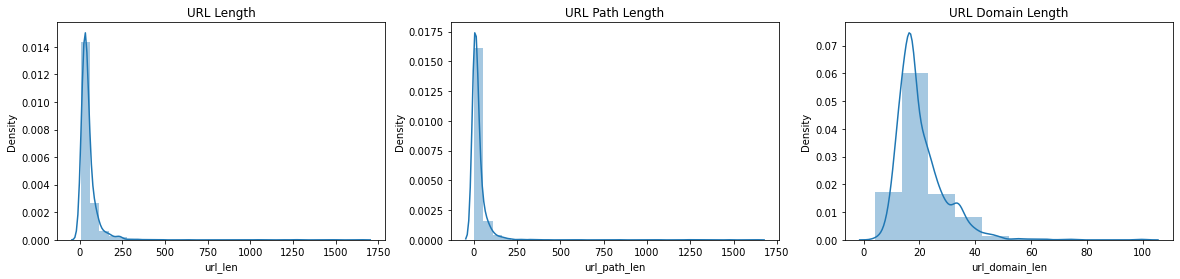

In [134]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title("URL Length")
sns.distplot(data['url_len'], hist = True, bins=30)

plt.subplot(1, 3, 2)
plt.title("URL Path Length")
sns.distplot(data['url_path_len'], hist = True, bins=30)

plt.subplot(1, 3, 3)
plt.title("URL Domain Length")
sns.distplot(data['url_domain_len'], hist = True, bins=10)

plt.show()

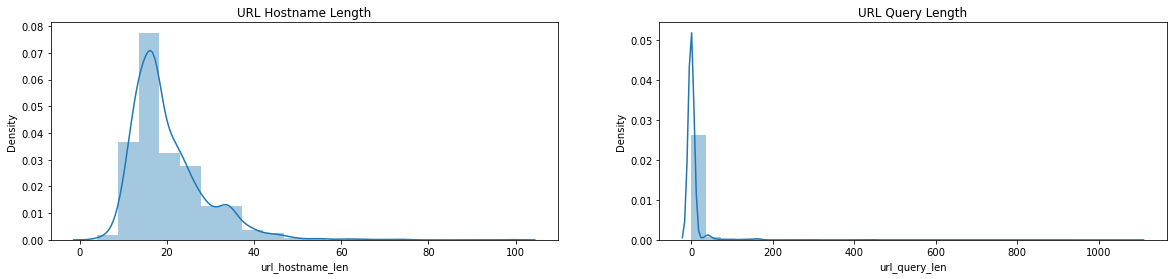

In [135]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 2, 1)
plt.title("URL Hostname Length")
sns.distplot(data['url_hostname_len'], hist = True, bins=20)

plt.subplot(1, 2, 2)
plt.title("URL Query Length")
sns.distplot(data['url_query_len'], hist = True, bins=30)

plt.show()

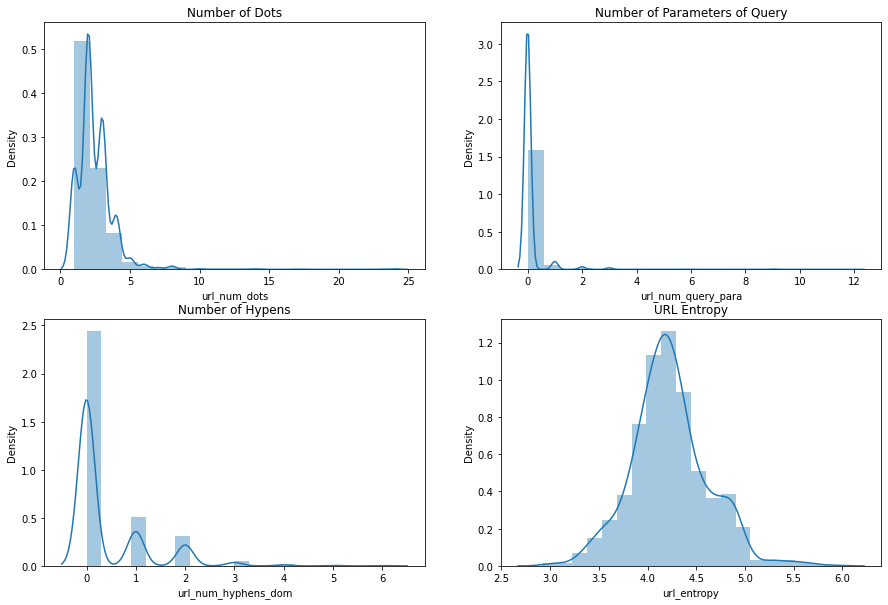

In [136]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Number of Dots")
sns.distplot(data['url_num_dots'],hist = True, bins=20)

plt.subplot(2, 2, 2)
plt.title("Number of Parameters of Query")
sns.distplot(data['url_num_query_para'], hist = True, bins=20)

plt.subplot(2, 2, 3)
plt.title("Number of Hypens")
sns.distplot(data['url_num_hyphens_dom'], hist = True, bins=20)

plt.subplot(2, 2, 4)
plt.title("URL Entropy")
sns.distplot(data['url_entropy'], hist = True, bins=20)

plt.show()

In [775]:
print("Number of Dots Unique value: ", data['url_num_dots'].unique())
print("Number of Parameters Unique value: ", data['url_num_query_para'].unique())
print("Number of Hypens Unique value: ", data['url_num_hyphens_dom'].unique())

Number of Dots Unique value:  [ 2.  6.  3.  4.  1.  9.  5. 32. 10.  7.  8. 11. 13. 12. 26. 14. 16.]
Number of Parameters Unique value:  [0. 1. 2. 3. 6. 7. 4. 9. 8.]
Number of Hypens Unique value:  [ 0.  2.  1.  3.  4.  6.  5. 14.]


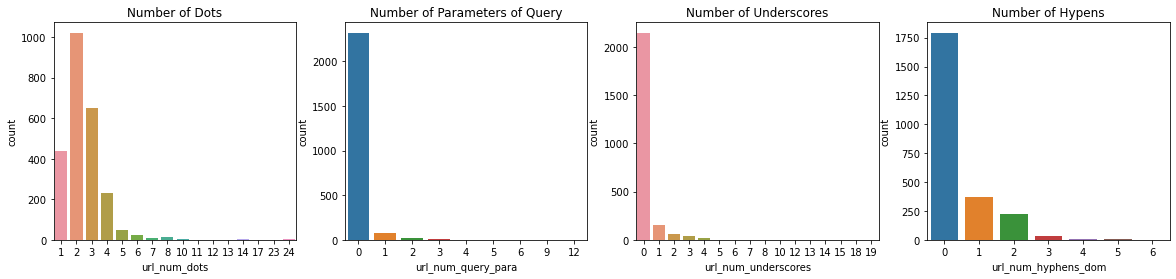

In [137]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.title("Number of Dots")
sns.countplot(data['url_num_dots'])

plt.subplot(1, 4, 2)
plt.title("Number of Parameters of Query")
sns.countplot(data['url_num_query_para'])

plt.subplot(1, 4, 3)
plt.title("Number of Underscores")
sns.countplot(data['url_num_underscores'])

plt.subplot(1, 4, 4)
plt.title("Number of Hypens")
sns.countplot(data['url_num_hyphens_dom'])

plt.show()

### **HTML Tag 단변량 분석**

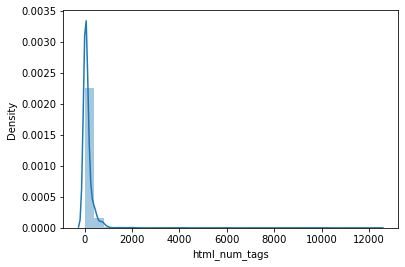

In [138]:
sns.distplot(data["html_num_tags"],hist = True, bins=30)
plt.show()

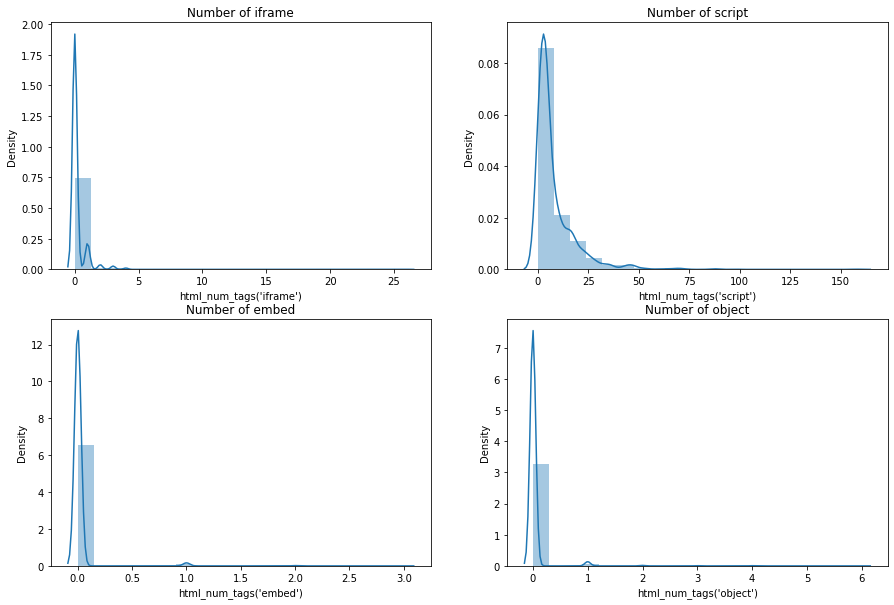

In [139]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Number of iframe")
sns.distplot(data["html_num_tags('iframe')"],hist = True, bins=20)

plt.subplot(2, 2, 2)
plt.title("Number of script")
sns.distplot(data["html_num_tags('script')"],hist = True, bins=20)

plt.subplot(2, 2, 3)
plt.title("Number of embed")
sns.distplot(data["html_num_tags('embed')"],hist = True, bins=20)

plt.subplot(2, 2, 4)
plt.title("Number of object")
sns.distplot(data["html_num_tags('object')"],hist = True, bins=20)

plt.show()

In [140]:
print("embed Tag Unique value: ", data["html_num_tags('embed')"].unique())
print("object Tag Unique value: ", data["html_num_tags('object')"].unique())
print("iframe Tag Unique value: ", data["html_num_tags('iframe')"].unique())

embed Tag Unique value:  [0 2 1 3]
object Tag Unique value:  [0 2 1 3 6 4]
iframe Tag Unique value:  [ 0  1  3  4  2 13 12 26  7]


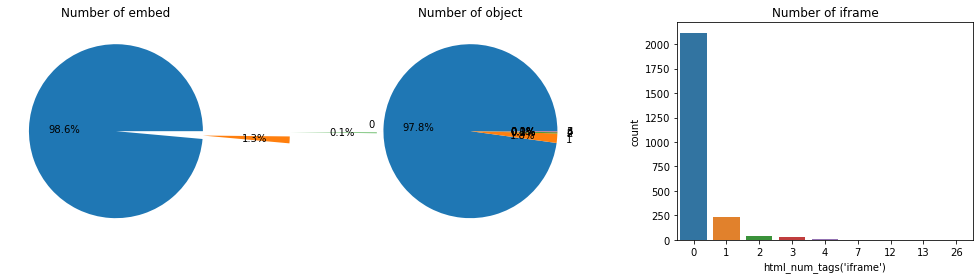

In [141]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Number of embed")
# sns.countplot(data["html_num_tags('embed')"])
embed = data["html_num_tags('embed')"].value_counts()
plt.pie(embed.values, embed.index, autopct='%.1f%%')

plt.subplot(1, 3, 2)
plt.title("Number of object")
ob = data["html_num_tags('object')"].value_counts()
plt.pie(ob.values, labels = ob.index, autopct = '%.1f%%')

plt.subplot(1, 3, 3)
plt.title("Number of iframe")
sns.countplot(data["html_num_tags('iframe')"])


plt.show()

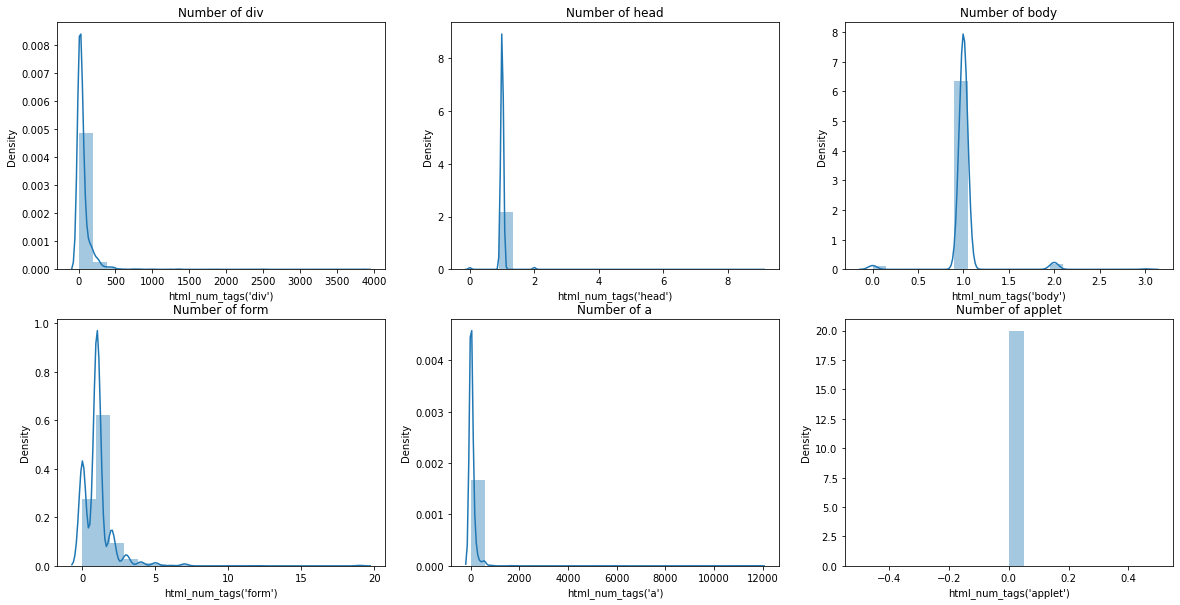

In [142]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title("Number of div")
sns.distplot(data["html_num_tags('div')"],hist = True, bins=20)

plt.subplot(2, 3, 2)
plt.title("Number of head")
sns.distplot(data["html_num_tags('head')"],hist = True, bins=20)

plt.subplot(2, 3, 3)
plt.title("Number of body")
sns.distplot(data["html_num_tags('body')"],hist = True, bins=20)

plt.subplot(2, 3, 4)
plt.title("Number of form")
sns.distplot(data["html_num_tags('form')"],hist = True, bins=20)

plt.subplot(2, 3, 5)
plt.title("Number of a")
sns.distplot(data["html_num_tags('a')"],hist = True, bins=20)

plt.subplot(2, 3, 6)
plt.title("Number of applet")
sns.distplot(data["html_num_tags('applet')"],hist = True, bins=20)

plt.show()

In [143]:
print("head Tag Unique value: ", data["html_num_tags('head')"].unique())
print("body Tag Unique value: ", data["html_num_tags('body')"].unique())
print("applet Tag Unique value: ", data["html_num_tags('applet')"].unique())

head Tag Unique value:  [1 0 2 9]
body Tag Unique value:  [1 0 2 3]
applet Tag Unique value:  [0]


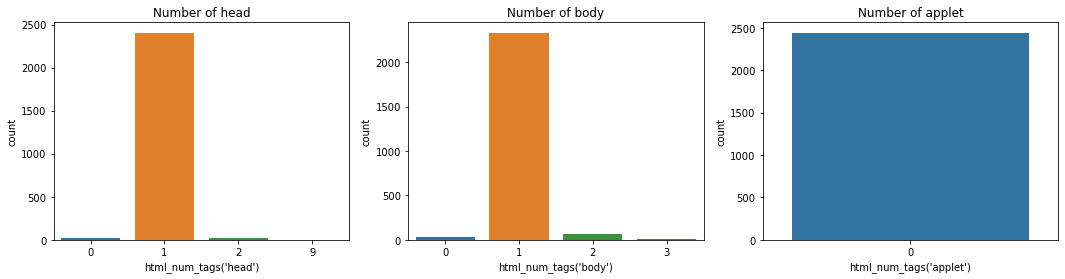

In [144]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Number of head")
sns.countplot(data["html_num_tags('head')"])

plt.subplot(1, 3, 2)
plt.title("Number of body")
sns.countplot(data["html_num_tags('body')"])

plt.subplot(1, 3, 3)
plt.title("Number of applet")
sns.countplot(data["html_num_tags('applet')"])

plt.show()

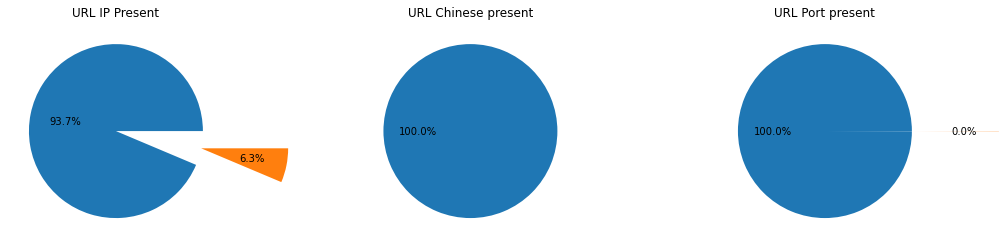

In [145]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("URL IP Present")
url_ip_present = data["url_ip_present"].value_counts()
plt.pie(url_ip_present.values, url_ip_present.index, autopct='%.1f%%')
# sns.countplot(data["url_ip_present"])

plt.subplot(1, 3, 2)
plt.title("URL Chinese present")
url_chinese_present = data["url_chinese_present"].value_counts()
plt.pie(url_chinese_present.values, url_chinese_present.index, autopct='%.1f%%')
# sns.countplot(data["url_chinese_present"])

plt.subplot(1, 3, 3)
plt.title("URL Port present")
url_port = data["url_port"].value_counts()
plt.pie(url_port.values, url_port.index, autopct='%.1f%%')
# sns.countplot(data["url_port"])

plt.show()